In [11]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

chunk = 'chunk23'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_cutted_kaylan_really_masked_chunk23.fits'
fn_obiwan = 'ngc_tractor_sim_match_really_masked_chunk23.fits'
fn_sim = 'ngc_sim_really_masked_chunk23.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)
sim = fits.getdata(topdir+fn_sim)
sim_m=sim

Populating the interactive namespace from numpy and matplotlib


In [33]:
obiwan.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'K'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 'D'
    name = 'VETOMASK'; format = 'B'
    name = 'MCHUNK'; format = 'B'
)

In [12]:
print(0.46784258*sim['mw_transmission_g']+0.55717425-sim['mw_transmission_z'])
numpy.polyfit(sim['mw_transmission_g'],sim['mw_transmission_z'],deg=1)
print(1.211/3.214)

[ 0.02054232  0.02019936  0.02013791 ...,  0.0166086   0.01653057
  0.01702493]
0.37678904791537027


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app


-0.0719720149215


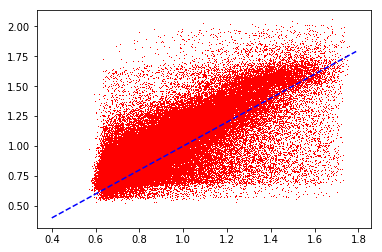

In [16]:
plt.plot(obiwan['flux_g'],obiwan['sim_gflux'],'r,')
x = np.arange(0.4,1.8,0.01)
y =x 
plt.plot(x,y,'b--')
#plt.plot(x,x-0.4,'b--')
#plt.plot(x,x+0.4,'b--')
print((obiwan['flux_g']-obiwan['sim_gflux']).mean())

-0.177165364404


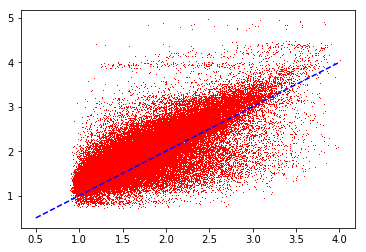

In [17]:
plt.plot(obiwan['flux_r'],obiwan['sim_rflux'],'r,')
x = np.arange(0.5,4.0,0.01)
y =x 
plt.plot(x,y,'b--')
print((obiwan['flux_r']-obiwan['sim_rflux']).mean())

-0.22635801269


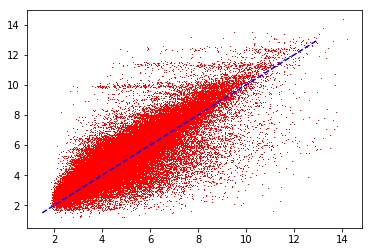

In [18]:
plt.plot(obiwan['flux_z'],obiwan['sim_zflux'],'r,')
x = np.arange(1.5,13,0.01)
y =x 
plt.plot(x,y,'b--')
print((obiwan['flux_z']-obiwan['sim_zflux']).mean())

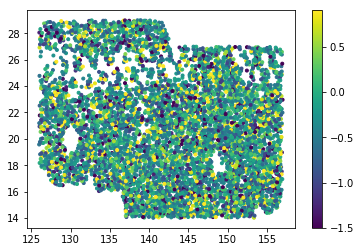

In [19]:
plt.scatter(obiwan['ra'][::20],obiwan['dec'][::20],c=obiwan['flux_z'][::20]-obiwan['sim_zflux'][::20],vmin=-1.5,vmax=0.9,marker='.')
plt.colorbar()

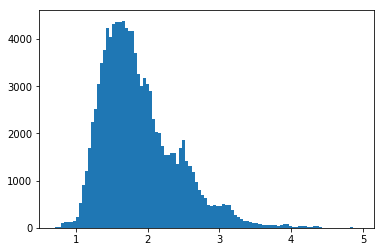

In [20]:
p = plt.hist(obiwan['sim_rflux'],bins=100)

In [80]:
#+/-2 sigma for sim flux
def dependency_hist(doutput,dinput,vmin,vmax,bins):
    interval = (vmax-vmin)/bins
    total_N_perbin = np.zeros(bins)
    hist = np.zeros(bins)
    outbin = 0
    var_tmp = [[] for i in range(bins)]
    for i in range(len(dinput)):
        if dinput[i]>=vmin and dinput[i]<vmax:
            n = int((dinput[i]-vmin)/interval)
            total_N_perbin[n] += 1
            var_tmp[n].append(dinput[i]-doutput[i])
            hist[n] += dinput[i]-doutput[i]
        else:
            outbin+=1
    lvar = [np.array(var_tmp[i]).std() for i in range(bins)]
    array_var = np.array(lvar)
    print('%d outbin' %outbin)
    x_axis = [vmin+interval*i for i in range(bins)]
    return total_N_perbin,hist,x_axis,array_var

In [81]:
(obiwan['sim_zflux']-obiwan['flux_z']).std()

0.93866313561453441

1806 outbin


Text(0.5,1,'# of targets per bin')

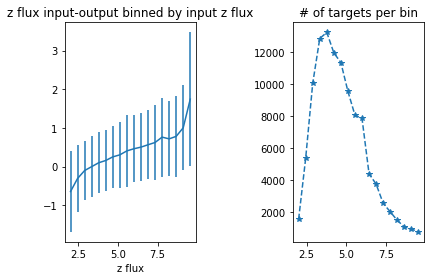

In [82]:
flux_type = 'z'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],2,10,18)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

6587 outbin


Text(0.5,1,'# of targets per bin')

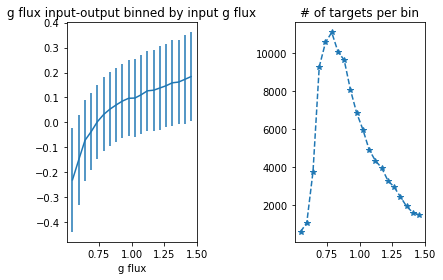

In [24]:
flux_type = 'g'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],0.55,1.5,20)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

5159 outbin


Text(0.5,1,'# of targets per bin')

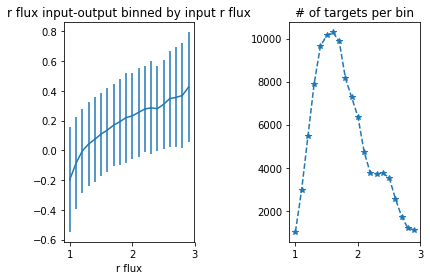

In [25]:
flux_type = 'r'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],1.0,3.0,20)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

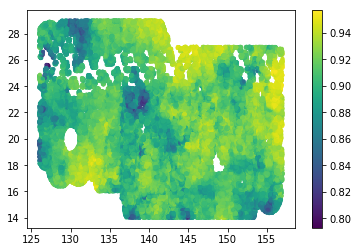

In [26]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_g'],marker='.')
plt.colorbar()

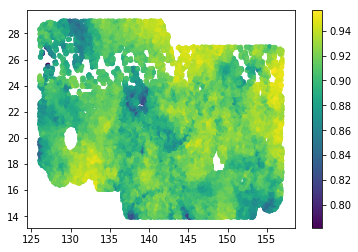

In [27]:
plt.scatter(DAT['ra'],DAT['dec'],c=10**(-0.4*3.214*DAT['ebv']), marker='.')
plt.colorbar()

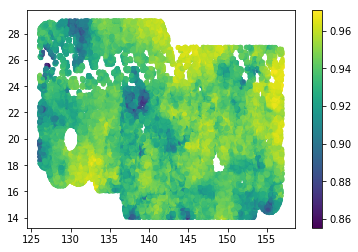

In [28]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_r'],marker='.')
plt.colorbar()

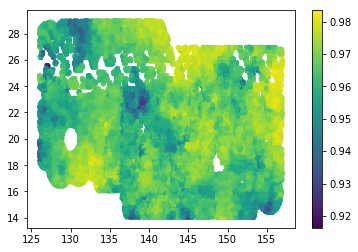

In [29]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_z'],marker='.')
plt.colorbar()

In [83]:
#+/-2 sigma for sim flux
def dependency_hist(d_to_measure,dinput,vmin=0.85,vmax=0.95,bins=10):
    interval = (vmax-vmin)/bins
    total_N_perbin = np.zeros(bins)
    hist = np.zeros(bins)
    outbin = 0
    var_tmp = [[] for i in range(bins)]
    for i in range(len(dinput)):
        if dinput[i]>=vmin and dinput[i]<vmax:
            n = int((dinput[i]-vmin)/interval)
            total_N_perbin[n] += 1
            var_tmp[n].append(d_to_measure[i])
            hist[n] += d_to_measure[i]
        else:
            outbin+=1
    lvar = [np.array(var_tmp[i]).std() for i in range(bins)]
    array_var = np.array(lvar)
    print('%d outbin' %outbin)
    x_axis = [vmin+interval*i for i in range(bins)]
    return total_N_perbin,hist,x_axis,array_var

1595 outbin
1595 outbin


Text(0.5,1,'absolute r flux diff')

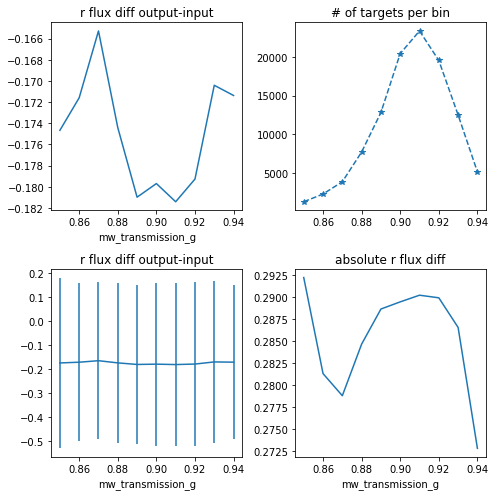

In [84]:
plt.figure(figsize=(7,7))
flux_type = 'r'
total_N_perbin,hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type] - obiwan['sim_'+flux_type+'flux'],obiwan['mw_transmission_g'])
plt.subplot(2,2,1)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title(flux_type+' flux diff output-input')
plt.subplot(2,2,2)
plt.plot(x_axis,total_N_perbin,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')
plt.subplot(2,2,3)
plt.errorbar(x_axis,hist/total_N_perbin,array_var)
#plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title(flux_type+' flux diff output-input')
plt.tight_layout()
plt.subplot(2,2,4)
total_N_perbin,hist,x_axis,array_var = dependency_hist(np.fabs(obiwan['flux_'+flux_type] - obiwan['sim_'+flux_type+'flux']),obiwan['mw_transmission_g'])
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title('absolute '+flux_type+' flux diff')

Text(0.5,15,'mw_transmission_g')

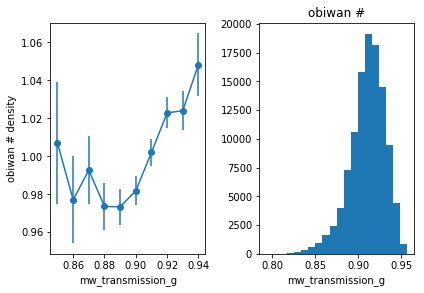

In [85]:
def desnity_dependency(obiwan = obiwan, vmin=0.85,vmax=0.95,bins=10):
    MAP = sim['mw_transmission_g']
    MAP2 = obiwan['mw_transmission_g']
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(obiwan))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = obiwan[(MAP2>=vmin+i*interval)&(MAP2<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
        #total_obiwan_var[i] = per_obiwan.std()
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y,err,x = desnity_dependency()

plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o')
plt.xlabel('mw_transmission_g')
plt.ylabel('obiwan # density')
plt.subplot(1,2,2)
p = plt.hist(obiwan['mw_transmission_g'],bins=20)
plt.tight_layout()
plt.title('obiwan #')
plt.xlabel('mw_transmission_g')

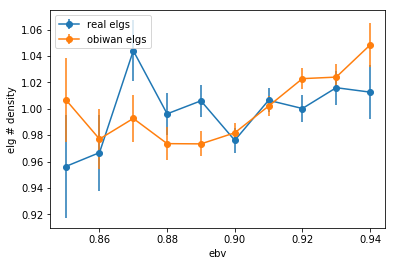

In [86]:
def desnity_dependency_DAT(obiwan = DAT, vmin=0.85,vmax=0.95,bins=10):
    DAT_MAP = 10**(-0.4*3.214*DAT['ebv'])
    MAP = sim['mw_transmission_g']
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(DAT))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = DAT[(DAT_MAP>=vmin+i*interval)&(DAT_MAP<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        #total_obiwan_var[i] = per_obiwan.std()
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y3,err3,x3 = desnity_dependency_DAT()
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.xlabel('ebv')
plt.ylabel('elg # density')
plt.legend()

Text(0.5,15,'mw_transmission_g')

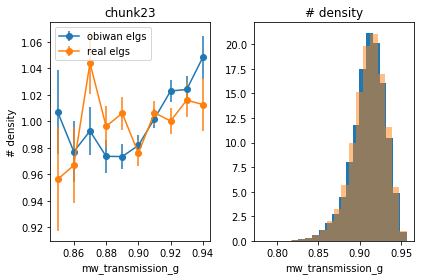

In [87]:
plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.xlabel('mw_transmission_g')
plt.legend()
plt.title('chunk23')
plt.ylabel('# density')
plt.subplot(1,2,2)
p = plt.hist(obiwan['mw_transmission_g'],bins=20,normed=True)
#p = plt.hist(gdat,bins=20,normed=True,alpha=0.5)
p = plt.hist(10**(-0.4*3.214*DAT['ebv']),bins=20,alpha=0.5,normed=True)
plt.tight_layout()
plt.title('# density')
plt.xlabel('mw_transmission_g')

In [57]:
-np.log10(0.85)/0.4/3.214,-np.log10(0.95)/0.4/3.214

(0.054901271224103348, 0.017327625008674744)

In [88]:
def desnity_dependency(obiwan = obiwan, vmin=0.017,vmax=0.05,bins=10):
    MAP = -np.log10(sim['mw_transmission_g'])/(0.4*3.214)
    MAP2 = -np.log10(obiwan['mw_transmission_g'])/(0.4*3.214)
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(obiwan))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = obiwan[(MAP2>=vmin+i*interval)&(MAP2<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
        #total_obiwan_var[i] = per_obiwan.std()
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y,err,x = desnity_dependency()

In [89]:
def desnity_dependency_DAT(obiwan = DAT, vmin=0.017,vmax=0.05,bins=10):
    DAT_MAP = DAT['ebv']
    MAP = -np.log10(sim['mw_transmission_g'])/(0.4*3.214)
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(DAT))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = DAT[(DAT_MAP>=vmin+i*interval)&(DAT_MAP<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        #total_obiwan_var[i] = per_obiwan.std()
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y3,err3,x3 = desnity_dependency_DAT()

In [90]:
err3

array([ 0.02337807,  0.01411504,  0.01129723,  0.00996964,  0.00958821,
        0.01120132,  0.01386104,  0.01778491,  0.02477109,  0.03032486])

Text(0.5,15,'ebv')

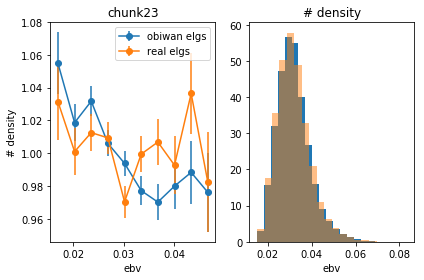

In [91]:
plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.xlabel('ebv')
plt.legend()
plt.title('chunk23')
plt.ylabel('# density')
plt.subplot(1,2,2)
p = plt.hist(-np.log10(obiwan['mw_transmission_g'])/(0.4*3.214),bins=20,normed=True)
#p = plt.hist(gdat,bins=20,normed=True,alpha=0.5)
p = plt.hist(DAT['ebv'],bins=20,alpha=0.5,normed=True)

plt.tight_layout()
plt.title('# density')
plt.xlabel('ebv')

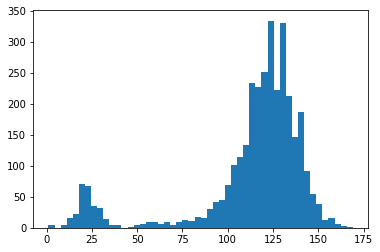

In [15]:
p = plt.hist(f_mw_g_counts,bins=50)
#choose 75 as the cut

In [92]:
import healpy as hp
res=256
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'],nest = True, lonlat = True)
pix_DAT = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = True, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = True, lonlat = True)

N = 12*res**2
mw_g_counts = np.zeros(N, dtype = np.float)
mw_g_value = np.zeros(N, dtype = np.float)
ids = np.arange(N)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    mw_g_counts[n]+=1
    mw_g_value[n]+=sim['mw_transmission_g'][i]
f_mw_g_counts = mw_g_counts[mw_g_counts>75]
f_mw_g_value = mw_g_value[mw_g_counts>75]
f_ids = ids[mw_g_counts>75]
mw_g_avg = f_mw_g_value/f_mw_g_counts


#MAP = np.hstack((f_ids, mw_g_avg))


vmin = 0.85
vmax = 0.95
bins = 15
interval = (vmax-vmin)/bins

#sim
tot_r = 0
binning_r = np.zeros(bins)
for i in range(len(sim)):
    n = pix_sim[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_r+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_r[bin_num]+=1
            
#obiwan
tot_o = 0
binning_o = np.zeros(bins)
for i in range(len(obiwan)):
    n = pix_obiwan[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_o+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_o[bin_num]+=1
            
#DAT
tot_g = 0
binning_g = np.zeros(bins)
for i in range(len(DAT)):
    n = pix_DAT[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_g+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_g[bin_num]+=1

ave_gr = tot_g/tot_r
ave_or = tot_o/tot_r
coeff_o = binning_r.sum()/binning_o.sum()
coeff_g = binning_r.sum()/binning_g.sum()
y_obiwan = binning_o/binning_r*coeff_o 
y_DAT = binning_g/binning_r*coeff_g
y_obiwan_err = np.sqrt(binning_o/(binning_r)**2./(ave_or)**2.+(binning_o/ave_or)**2./(binning_r)**3.)
y_DAT_err = np.sqrt(binning_g/(binning_r)**2./(ave_gr)**2.+(binning_g/ave_gr)**2./(binning_r)**3.)

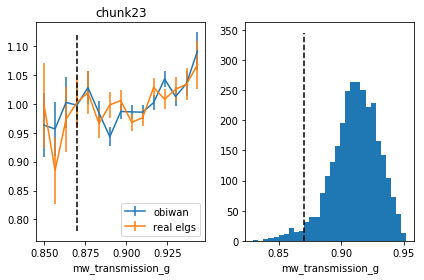

In [93]:
plt.subplot(1,2,1)
x_axis = [vmin+interval*i for i in range(bins)]
plt.errorbar(x_axis, y_obiwan, y_obiwan_err, label = 'obiwan')
plt.errorbar(x_axis, y_DAT, y_DAT_err, label = 'real elgs')
plt.xlabel('mw_transmission_g')
y=np.arange(0.78, 1.13, 0.01)
x = np.ones(len(y))*0.87
plt.plot(x,y, 'k--')
plt.title('chunk23')
plt.legend()
plt.subplot(1,2,2)
#vmax, vmin is determined via this plot
plt.hist(mw_g_avg,bins=30)
plt.xlabel('mw_transmission_g')
y = np.arange(0, 350, 5)
x = np.ones(len(y))*0.87
plt.plot(x,y, 'k--')
plt.tight_layout()

In [94]:
np.savetxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/systematics/obiwan_kaylan_chunk23',\
          np.vstack((x_axis, y_obiwan, y_obiwan_err)))

In [95]:
np.savetxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/systematics/real_elg_chunk23',\
          np.vstack((x_axis, y_DAT, y_DAT_err)))

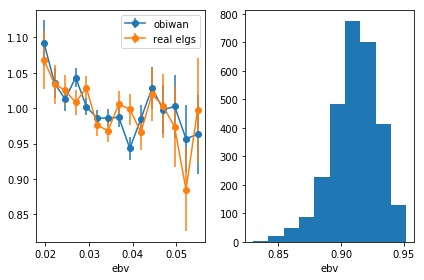

In [96]:
plt.subplot(1,2,1)
x_axis = [vmin+interval*i for i in range(bins)]
plt.errorbar(-np.log10(x_axis)/(0.4*3.214), y_obiwan, y_obiwan_err, label = 'obiwan', marker = 'o')
plt.errorbar(-np.log10(x_axis)/(0.4*3.214), y_DAT, y_DAT_err, label = 'real elgs', marker = 'o')
plt.xlabel('ebv')
plt.legend()
plt.subplot(1,2,2)
#vmax, vmin is determined via this plot
plt.hist(mw_g_avg)
plt.xlabel('ebv')
plt.tight_layout()